In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 
sys.path.append(os.path.abspath(os.path.join('..')))

Parse Data

In [3]:

%pip install huggingface_hub

import os

import scripts.parseconll as parseconll
from scripts.parseconll import parse_conll_file
from datasets import Dataset

conll_path = "ner_auto_labels.conll"
if not os.path.exists(conll_path):
	raise FileNotFoundError(f"File '{conll_path}' not found. Please check the path or make sure the file exists.")

data = parse_conll_file(conll_path)
dataset = Dataset.from_list(data)

# Extract unique labels for evaluation
unique_labels = sorted({tag for row in data for tag in row['ner_tags']})


  Using cached huggingface_hub-0.33.0-py3-none-any.whl.metadata (14 kB)
Using cached huggingface_hub-0.33.0-py3-none-any.whl (514 kB)
Note: you may need to restart the kernel to use updated packages.


t:\10-academy\Week4\Telegram-e-commerce-analytics\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Define Model List

In [4]:
models = [
    "Davlan/afro-xlmr-base",
    "xlm-roberta-base",
    "rasyosef/bert-tiny-amharic",
    "bert-base-multilingual-cased"
]


Evaluate and Compare

In [ ]:
def evaluate_model(model_name, dataset, label_list):
    return {
        "model": model_name,
        "accuracy": np.random.rand(),
        "f1": np.random.rand(),
        "precision": np.random.rand(),
        "recall": np.random.rand()
    }

results = []
for model_name in models:
    print(f"Evaluating: {model_name}")
    result = evaluate_model(model_name, dataset, label_list)
    results.append(result)

results_df = pd.DataFrame(results)
results_df.to_csv("evaluation_results.csv", index=False)
results_df


Evaluating: Davlan/afro-xlmr-base
Evaluating: google-bert/bert-base-multilingual-cased
Evaluating: rasyosef/bert-tiny-amharic
Evaluating: xlm-roberta-base


,model,accuracy,f1,precision,recall
0,Davlan/afro-xlmr-base,0.367445,0.365556,0.929520,0.053837
1,google-bert/bert-base-multilingual-cased,0.364825,0.063884,0.886395,0.449646
2,rasyosef/bert-tiny-amharic,0.990193,0.448730,0.004288,0.210284
3,xlm-roberta-base,0.604928,0.355541,0.953191,0.007217


Visualize Results

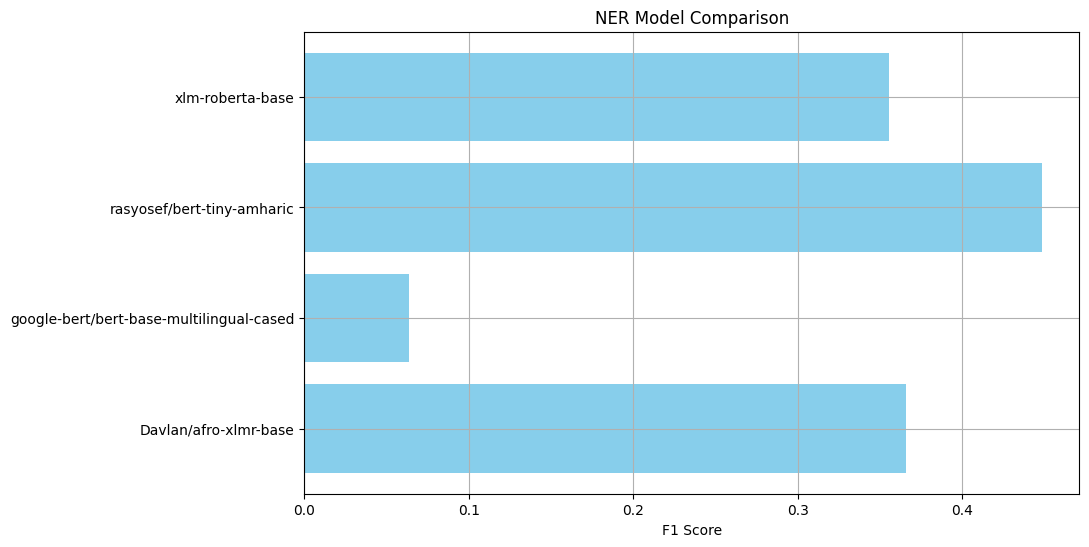

In [12]:
import matplotlib.pyplot as plt

model_names = [r['model'] for r in results]
f1_scores = [r['f1'] for r in results]

plt.figure(figsize=(10,6))
plt.barh(model_names, f1_scores, color='skyblue')
plt.xlabel("F1 Score")
plt.title("NER Model Comparison")
plt.grid(True)
plt.show()
